In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./results/breakeven_prices_refineries.csv')
df.sort_values(by=['Breakeven price ($/MMBtu)'], inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df

,ref_id,Ref. Dem. (kg/day),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Ann. carbon emissions (kgCO2eq/year),Net Revenues ($/year)
0,CH_PAS,296403.233462,0,297.0,0,iMSR,2,9.750257,2.785506e+07,-1.595693e+08
1,WR_WOO,275407.694269,0,276.0,0,PBR-HTGR,3,9.862150,2.495128e+07,-1.499678e+08
2,Fl_SAI,288453.321893,0,289.0,0,iMSR,2,9.965049,2.710475e+07,-1.587104e+08
3,VA_BEN,89510.008206,0,90.0,0,PBR-HTGR,1,10.072862,8.136288e+06,-4.978228e+07
4,VA_NOR,129433.726403,0,130.0,0,iMSR,1,10.886114,1.219245e+07,-7.779840e+07
5,HO_EL,81172.794100,0,82.0,0,PBR-HTGR,1,10.922715,7.413062e+06,-4.895436e+07
6,TE_CAR,79564.451739,0,80.0,0,PBR-HTGR,1,11.096396,7.232256e+06,-4.874738e+07
7,BP_FER,123324.900195,0,124.0,0,iMSR,1,11.330747,1.162972e+07,-7.715421e+07
8,MA_MAR,118683.640511,0,119.0,0,iMSR,1,11.691929,1.116078e+07,-7.661739e+07
9,WR_BOR,117784.691027,0,118.0,0,iMSR,1,11.764654,1.106699e+07,-7.651002e+07


In [3]:
anr_param = pd.read_excel('ANRs.xlsx', sheet_name='FOAK')
anr_param

,Reactor,Type,Power in MWe,Power in MWt,MSL in MWe,Thermal Efficiency,Thermal transfer efficiency,MDT in hours,Ramp Rate (fraction of capacity/hr),Ramp Rate (MW/hr),Outlet Temp (C),CAPEX $/MWe,FOPEX $/MWe-y,Max Modules,VOM in $/MWh-e,Startupfixedcost in $,Life (y)
0,iPWR,PWR,77.0,250,15.4,0.31,1.000,20,0.4,24.0,302,5535000,115000,12,0.75,38500,30
1,HTGR,HTGR,164.0,350,32.8,0.47,0.897,20,6.0,984.0,950,7500000,164000,4,0.00,82000,30
2,PBR-HTGR,HTGR,80.0,200,32.0,0.40,0.751,20,2.4,48.0,750,4569000,100000,12,0.00,40000,30
3,iMSR,MSR,141.0,300,28.2,0.47,0.936,20,0.6,84.6,700,4091000,85000,12,0.50,70500,30
4,Micro,HTGR,6.7,20,2.7,0.33,0.897,20,6.0,24.0,630,10902000,264000,12,0.00,3350,30


### Compute deployed power at each refinery and cumulative deployed ANR capacity

In [4]:
anr_thermal_power = anr_param[['Power in MWt', 'Reactor']]
anr_thermal_power
df = df.merge(anr_thermal_power, how='inner', left_on=['ANR type'], right_on=['Reactor'])
df.sort_values(by=['Breakeven price ($/MMBtu)'], inplace=True)
df['Deployed Power (MWt)'] = df['Power in MWt']*df['# ANR modules']
df['ANR Nameplate Capacity (GWt)'] = df['Deployed Power (MWt)'].cumsum()/1000
df

,ref_id,Ref. Dem. (kg/day),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Ann. carbon emissions (kgCO2eq/year),Net Revenues ($/year),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt)
0,CH_PAS,296403.233462,0,297.0,0,iMSR,2,9.750257,2.785506e+07,-1.595693e+08,300,iMSR,600,0.60
7,WR_WOO,275407.694269,0,276.0,0,PBR-HTGR,3,9.862150,2.495128e+07,-1.499678e+08,200,PBR-HTGR,600,1.20
1,Fl_SAI,288453.321893,0,289.0,0,iMSR,2,9.965049,2.710475e+07,-1.587104e+08,300,iMSR,600,1.80
8,VA_BEN,89510.008206,0,90.0,0,PBR-HTGR,1,10.072862,8.136288e+06,-4.978228e+07,200,PBR-HTGR,200,2.00
2,VA_NOR,129433.726403,0,130.0,0,iMSR,1,10.886114,1.219245e+07,-7.779840e+07,300,iMSR,300,2.30
9,HO_EL,81172.794100,0,82.0,0,PBR-HTGR,1,10.922715,7.413062e+06,-4.895436e+07,200,PBR-HTGR,200,2.50
10,TE_CAR,79564.451739,0,80.0,0,PBR-HTGR,1,11.096396,7.232256e+06,-4.874738e+07,200,PBR-HTGR,200,2.70
3,BP_FER,123324.900195,0,124.0,0,iMSR,1,11.330747,1.162972e+07,-7.715421e+07,300,iMSR,300,3.00
4,MA_MAR,118683.640511,0,119.0,0,iMSR,1,11.691929,1.116078e+07,-7.661739e+07,300,iMSR,300,3.30
5,WR_BOR,117784.691027,0,118.0,0,iMSR,1,11.764654,1.106699e+07,-7.651002e+07,300,iMSR,300,3.60


### Compute cumulative number of viable refineries and ANR modules

In [5]:
df['Viable ANR modules count'] = df['# ANR modules'].cumsum()
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df['Viable ANR refineries count'] = df.index+1
df.head(5)

,ref_id,Ref. Dem. (kg/day),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Ann. carbon emissions (kgCO2eq/year),Net Revenues ($/year),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt),Viable ANR modules count,Viable ANR refineries count
0,CH_PAS,296403.233462,0,297.0,0,iMSR,2,9.750257,2.785506e+07,-1.595693e+08,300,iMSR,600,0.6,2,1
1,WR_WOO,275407.694269,0,276.0,0,PBR-HTGR,3,9.862150,2.495128e+07,-1.499678e+08,200,PBR-HTGR,600,1.2,5,2
2,Fl_SAI,288453.321893,0,289.0,0,iMSR,2,9.965049,2.710475e+07,-1.587104e+08,300,iMSR,600,1.8,7,3
3,VA_BEN,89510.008206,0,90.0,0,PBR-HTGR,1,10.072862,8.136288e+06,-4.978228e+07,200,PBR-HTGR,200,2.0,8,4
4,VA_NOR,129433.726403,0,130.0,0,iMSR,1,10.886114,1.219245e+07,-7.779840e+07,300,iMSR,300,2.3,9,5


### Compute avoided carbon emissions 

In [6]:
SMR_carbon_intensity = 11.888 #kgCO2eq/kgH2
df['Ann. avoided CO2 emissions (MMT-CO2/year)'] = (df['Ref. Dem. (kg/day)']*365*SMR_carbon_intensity - df['Ann. carbon emissions (kgCO2eq/year)'])/1e9
df['Viable avoided emissions (MMT-CO2/year)'] = df['Ann. avoided CO2 emissions (MMT-CO2/year)'].cumsum()
df

,ref_id,Ref. Dem. (kg/day),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Ann. carbon emissions (kgCO2eq/year),Net Revenues ($/year),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt),Viable ANR modules count,Viable ANR refineries count,Ann. avoided CO2 emissions (MMT-CO2/year),Viable avoided emissions (MMT-CO2/year)
0,CH_PAS,296403.233462,0,297.0,0,iMSR,2,9.750257,2.785506e+07,-1.595693e+08,300,iMSR,600,0.60,2,1,1.258274,1.258274
1,WR_WOO,275407.694269,0,276.0,0,PBR-HTGR,3,9.862150,2.495128e+07,-1.499678e+08,200,PBR-HTGR,600,1.20,5,2,1.170076,2.428350
2,Fl_SAI,288453.321893,0,289.0,0,iMSR,2,9.965049,2.710475e+07,-1.587104e+08,300,iMSR,600,1.80,7,3,1.224529,3.652879
3,VA_BEN,89510.008206,0,90.0,0,PBR-HTGR,1,10.072862,8.136288e+06,-4.978228e+07,200,PBR-HTGR,200,2.00,8,4,0.380258,4.033137
4,VA_NOR,129433.726403,0,130.0,0,iMSR,1,10.886114,1.219245e+07,-7.779840e+07,300,iMSR,300,2.30,9,5,0.549436,4.582573
5,HO_EL,81172.794100,0,82.0,0,PBR-HTGR,1,10.922715,7.413062e+06,-4.895436e+07,200,PBR-HTGR,200,2.50,10,6,0.344805,4.927379
6,TE_CAR,79564.451739,0,80.0,0,PBR-HTGR,1,11.096396,7.232256e+06,-4.874738e+07,200,PBR-HTGR,200,2.70,11,7,0.338007,5.265386
7,BP_FER,123324.900195,0,124.0,0,iMSR,1,11.330747,1.162972e+07,-7.715421e+07,300,iMSR,300,3.00,12,8,0.523492,5.788878
8,MA_MAR,118683.640511,0,119.0,0,iMSR,1,11.691929,1.116078e+07,-7.661739e+07,300,iMSR,300,3.30,13,9,0.503822,6.292700
9,WR_BOR,117784.691027,0,118.0,0,iMSR,1,11.764654,1.106699e+07,-7.651002e+07,300,iMSR,300,3.60,14,10,0.500015,6.792715


### Save clean version of results


In [7]:
df_clean = df[["ref_id", 'Ref. Dem. (kg/day)', 'HTSE', 'ANR type', '# ANR modules', 'Net Revenues ($/year)', 'Ann. avoided CO2 emissions (MMT-CO2/year)', 'Breakeven price ($/MMBtu)']]
df_clean.sort_values(by=['Ref. Dem. (kg/day)'], ascending=False, inplace=True)
df_clean['Ref. Dem. (kg/day)'] /=1e3
df_clean['HTSE'] = df_clean['HTSE'].apply(lambda x: int(x))
df_clean['Ref. Dem. (kg/day)'] = df_clean['Ref. Dem. (kg/day)'].apply(lambda x:np.round(x,2))
df_clean['Net Revenues ($/year)'] /=1e6
df_clean['Net Revenues ($/year)'] = df_clean['Net Revenues ($/year)'].apply(lambda x: np.round(x,2))
df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)']= df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)'].apply(lambda x: np.round(x,2))
df_clean['Avoided cost of CO2 ($/ton)'] = df_clean['Net Revenues ($/year)']/df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)']
df_clean['Avoided cost of CO2 ($/ton)'] = df_clean['Avoided cost of CO2 ($/ton)'].apply(lambda x:np.round(np.abs(x),2))
df_clean.rename(columns={'Ref. Dem. (kg/day)': 'Demand (MT H2/day)',
                         'Net Revenues ($/year)': 'Cost (M$/year)', 
                         'ANR type': 'ANR', 
                         '# ANR modules': '#'}, inplace=True)
df_clean.to_csv('./results/breakeven_prices_refineries_clean.csv', index=False)

C:\Users\mgarrou\AppData\Local\Temp\ipykernel_19516\3710225996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.sort_values(by=['Ref. Dem. (kg/day)'], ascending=False, inplace=True)
C:\Users\mgarrou\AppData\Local\Temp\ipykernel_19516\3710225996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ref. Dem. (kg/day)'] /=1e3
C:\Users\mgarrou\AppData\Local\Temp\ipykernel_19516\3710225996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

### Plots

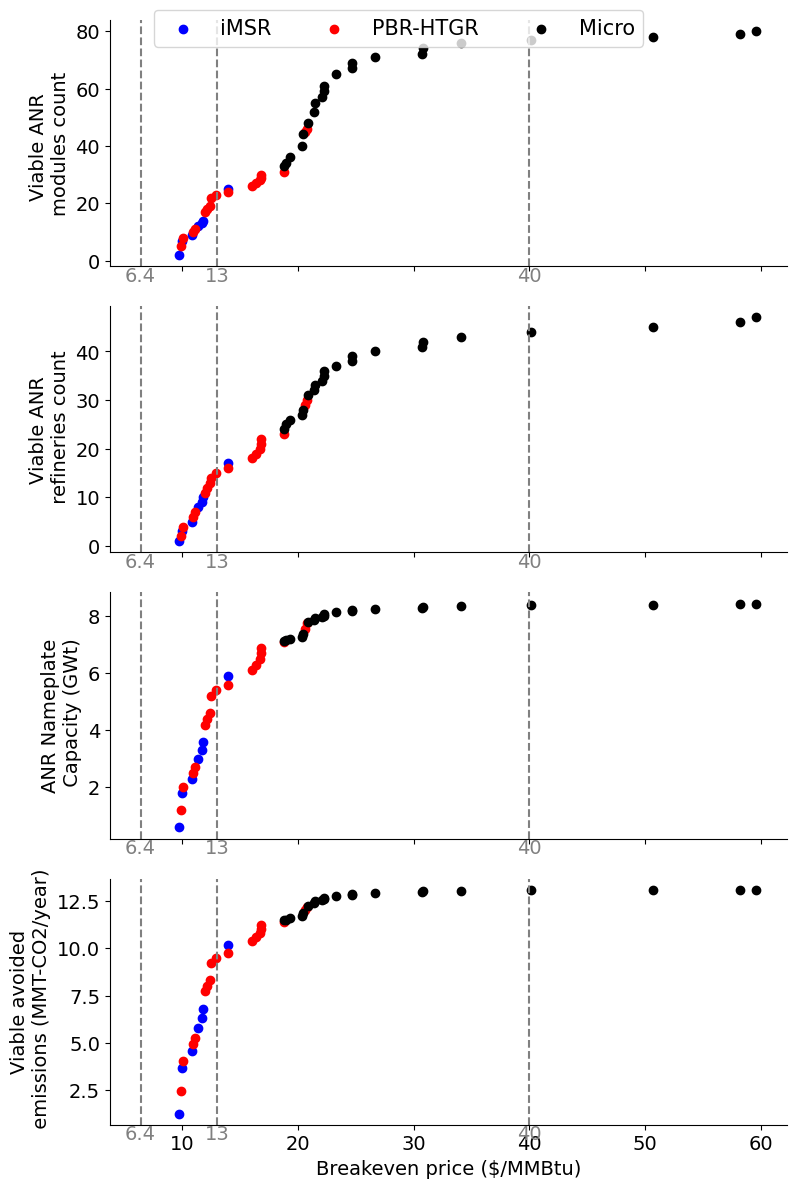

In [8]:
#Use latex font
#plt.rcParams['text.usetex'] = True
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['font.size'] = 14

# Create subplots
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(8, 12))

# Get unique ANR types and assign colors
anr_types = df['ANR type'].unique()

colors = ['blue', 'red', 'black']  # Adjust the colors according to the unique ANR types
# Initialize empty handles for legend
handles = []
# Plotting the data as scatter plots with different colors for each ANR type
labels = {'Viable ANR modules count': 'Viable ANR \nmodules count', 
            'Viable ANR refineries count': 'Viable ANR\n refineries count', 
            'ANR Nameplate Capacity (GWt)': 'ANR Nameplate\n Capacity (GWt)',
            'Viable avoided emissions (MMT-CO2/year)': 'Viable avoided\n emissions (MMT-CO2/year)'}
for i, col in enumerate(['Viable ANR modules count', 'Viable ANR refineries count', 'ANR Nameplate Capacity (GWt)', 'Viable avoided emissions (MMT-CO2/year)']):
    for anr_type, color in zip(anr_types, colors):
        subset = df[df['ANR type'] == anr_type]
        axs[i].scatter(subset['Breakeven price ($/MMBtu)'], subset[col], color=color, label=f'{anr_type}')
    axs[i].set_ylabel(labels[col])

    # Remove the top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

    # Adding vertical lines
    vertical_lines = [6.4, 13, 40]
    for line in vertical_lines:
        axs[i].axvline(x=line, linestyle='--', color='grey')
        axs[i].text(line, axs[i].get_ylim()[0], str(line), color='grey', va='top', ha='center')
# Setting the title and labels
plt.xlabel('Breakeven price ($/MMBtu)')
#fig.text(0.5, 0.07, 'Breakeven price ($/MMBtu)', ha='center')

# Add a common legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(anr_types))
fig.tight_layout()
#plt.show()
plt.savefig('./results/breakeven_price_refineries.png')